## Описание данных и причины выбора

Данный dataset был выбран не случайно, в будущем хочу заниматься data science в сфере недвижимости.

House Prices - Advanced Regression Techniques

Dataset Description

**File descriptions**

- **train.csv** - the training set  
- **test.csv** - the test set  
- **data_description.txt** - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here  
- **sample_submission.csv** - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms  

**Data fields**

Here's a brief version of what you'll find in the data description file.

- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.  
- **MSSubClass**: The building class  
- **MSZoning**: The general zoning classification  
- **LotFrontage**: Linear feet of street connected to property  
- **LotArea**: Lot size in square feet  
- **Street**: Type of road access  
- **Alley**: Type of alley access  
- **LotShape**: General shape of property  
- **LandContour**: Flatness of the property  
- **Utilities**: Type of utilities available  
- **LotConfig**: Lot configuration  
- **LandSlope**: Slope of property  
- **Neighborhood**: Physical locations within Ames city limits  
- **Condition1**: Proximity to main road or railroad  
- **Condition2**: Proximity to main road or railroad (if a second is present)  
- **BldgType**: Type of dwelling  
- **HouseStyle**: Style of dwelling  
- **OverallQual**: Overall material and finish quality  
- **OverallCond**: Overall condition rating  
- **YearBuilt**: Original construction date  
- **YearRemodAdd**: Remodel date  
- **RoofStyle**: Type of roof  
- **RoofMatl**: Roof material  
- **Exterior1st**: Exterior covering on house  
- **Exterior2nd**: Exterior covering on house (if more than one material)  
- **MasVnrType**: Masonry veneer type  
- **MasVnrArea**: Masonry veneer area in square feet  
- **ExterQual**: Exterior material quality  
- **ExterCond**: Present condition of the material on the exterior  
- **Foundation**: Type of foundation  
- **BsmtQual**: Height of the basement  
- **BsmtCond**: General condition of the basement  
- **BsmtExposure**: Walkout or garden level basement walls  
- **BsmtFinType1**: Quality of basement finished area  
- **BsmtFinSF1**: Type 1 finished square feet  
- **BsmtFinType2**: Quality of second finished area (if present)  
- **BsmtFinSF2**: Type 2 finished square feet  
- **BsmtUnfSF**: Unfinished square feet of basement area  
- **TotalBsmtSF**: Total square feet of basement area  
- **Heating**: Type of heating  
- **HeatingQC**: Heating quality and condition  
- **CentralAir**: Central air conditioning  
- **Electrical**: Electrical system  
- **1stFlrSF**: First Floor square feet  
- **2ndFlrSF**: Second floor square feet  
- **LowQualFinSF**: Low quality finished square feet (all floors)  
- **GrLivArea**: Above grade (ground) living area square feet  
- **BsmtFullBath**: Basement full bathrooms  
- **BsmtHalfBath**: Basement half bathrooms  
- **FullBath**: Full bathrooms above grade  
- **HalfBath**: Half baths above grade  
- **Bedroom**: Number of bedrooms above basement level  
- **Kitchen**: Number of kitchens  
- **KitchenQual**: Kitchen quality  
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)  
- **Functional**: Home functionality rating  
- **Fireplaces**: Number of fireplaces  
- **FireplaceQu**: Fireplace quality  
- **GarageType**: Garage location  
- **GarageYrBlt**: Year garage was built  
- **GarageFinish**: Interior finish of the garage  
- **GarageCars**: Size of garage in car capacity  
- **GarageArea**: Size of garage in square feet  
- **GarageQual**: Garage quality  
- **GarageCond**: Garage condition  
- **PavedDrive**: Paved driveway  
- **WoodDeckSF**: Wood deck area in square feet  
- **OpenPorchSF**: Open porch area in square feet  
- **EnclosedPorch**: Enclosed porch area in square feet  
- **3SsnPorch**: Three season porch area in square feet  
- **ScreenPorch**: Screen porch area in square feet  
- **PoolArea**: Pool area in square feet  
- **PoolQC**: Pool quality  
- **Fence**: Fence quality  
- **MiscFeature**: Miscellaneous feature not covered in other categories  
- **MiscVal**: $Value of miscellaneous feature  
- **MoSold**: Month Sold  
- **YrSold**: Year Sold  
- **SaleType**: Type of sale  
- **SaleCondition**: Condition of sale  


## Библиотеки

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"raretears","key":"35e249f9a1c2c63a71b020f5ac1939f8"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip '/content/house-prices-advanced-regression-techniques.zip' -d '/content/house-prices-advanced-regression-techniques'

Archive:  /content/house-prices-advanced-regression-techniques.zip
replace /content/house-prices-advanced-regression-techniques/data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.optim.lr_scheduler import StepLR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.impute import KNNImputer
from tqdm import tqdm
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Основная часть

### Загрузка данных

In [ ]:
df = pd.read_csv('/content/house-prices-advanced-regression-techniques/train.csv')

In [ ]:
def analyze_dataframe(df):
    display("Первые строчки:", df.head())
    display("Последние строчки:", df.tail())
    display("Случайные строчки:", df.sample(5))
    display("Информация о каждом столбце:", df.describe())
    display("Общая информация:")
    df.info()
    display("Явные дубликаты:", df.duplicated().sum())
    display("Сортировка и количество пропущенных значений:", df.isnull().sum().sort_values())

In [ ]:
analyze_dataframe(df)

'Первые строчки:'

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


'Последние строчки:'

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


'Случайные строчки:'

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1219,1220,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1971,1971,Gable,CompShg,CemntBd,CmentBd,BrkFace,236.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,672,672,GasA,TA,Y,SBrkr,672,546,0,1218,0,0,1,1,3,1,TA,7,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,201,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,91500
1414,1415,50,RL,64.0,13053,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,7,1923,2000,Gambrel,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,833,833,GasA,Gd,Y,SBrkr,1053,795,0,1848,0,0,1,1,4,1,Gd,8,Typ,1,Gd,Detchd,1922.0,Unf,2,370,TA,TA,N,0,0,0,0,220,0,NaN,NaN,NaN,0,6,2008,WD,Normal,207000
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
480,481,20,RL,98.0,16033,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2004,2005,Hip,CompShg,VinylSd,VinylSd,BrkFace,378.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1261,Unf,0,572,1833,GasA,Ex,Y,SBrkr,1850,0,0,1850,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2004.0,Fin,3,772,TA,TA,Y,519,112,0,0,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal,326000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000


'Информация о каждом столбце:'

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


'Общая информация:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

'Явные дубликаты:'

0

'Сортировка и количество пропущенных значений:'

,0
Id,0
TotalBsmtSF,0
Heating,0
SaleCondition,0
CentralAir,0
1stFlrSF,0
2ndFlrSF,0
LowQualFinSF,0
GrLivArea,0
BsmtFullBath,0


#### Промежуточные выводы:
1. В 19 столбцах есть пропуски. В столбцах Alley, PoolQC, MiscFeature, и Fence  больше 70% пропусков, целесообразно удалить эти столбцы, остальные столбца стоит заполнить мединным значением для численных. Для категориальных переменных с пропусками, таких как MasVnrType и FireplaceQu, можно заменить пропуски на наиболее частое значение или создать новую категорию, обозначающую отсутствие данных
2. Данные представляют собой 1460 строчек и 80 столбцов, с различными типами даннх, int64 float64, object
3. Дубликаты отсутствуют
4. Столбец Id - большая корреляция с целевым признаком - удалим.

### Предобработка данных

На данном этапе выполним подготовку данных для обучения. Будут выполненны следующие шаги:
1. Удалим не нужные столбцы
2. Выделим численные и категориальные признаки, с последующим заполнением пропусков
3. Закодируем категориальные признаки
4. Проверим численные признаки на выбросы
5. Нормируем признаки

Удалим не нужные столбцы и заполним пропуски в численных и категориальных признаках

In [ ]:
columns_to_drop = ['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'Id']
df = df.drop(columns=columns_to_drop)

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)
df[numerical_columns] = knn_imputer.fit_transform(df[numerical_columns])
for column in categorical_columns:
    most_frequent_value = df[column].mode()[0]
    df[column] = df[column].fillna(most_frequent_value)


df.isnull().sum().sort_values()


,0
MSSubClass,0
Fireplaces,0
Functional,0
TotRmsAbvGrd,0
KitchenQual,0
KitchenAbvGr,0
BedroomAbvGr,0
HalfBath,0
FullBath,0
BsmtHalfBath,0


Отличо, пропусков нет

Кодировка категориальных признаков

In [ ]:
for name in categorical_columns:
    dummies = pd.get_dummies(df[name], prefix=name, drop_first=False, dtype=int)
    df = pd.concat([df, dummies], axis=1)

df = df.drop(columns=categorical_columns)

df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,Garage

Посмотрим на распределение численных признаков

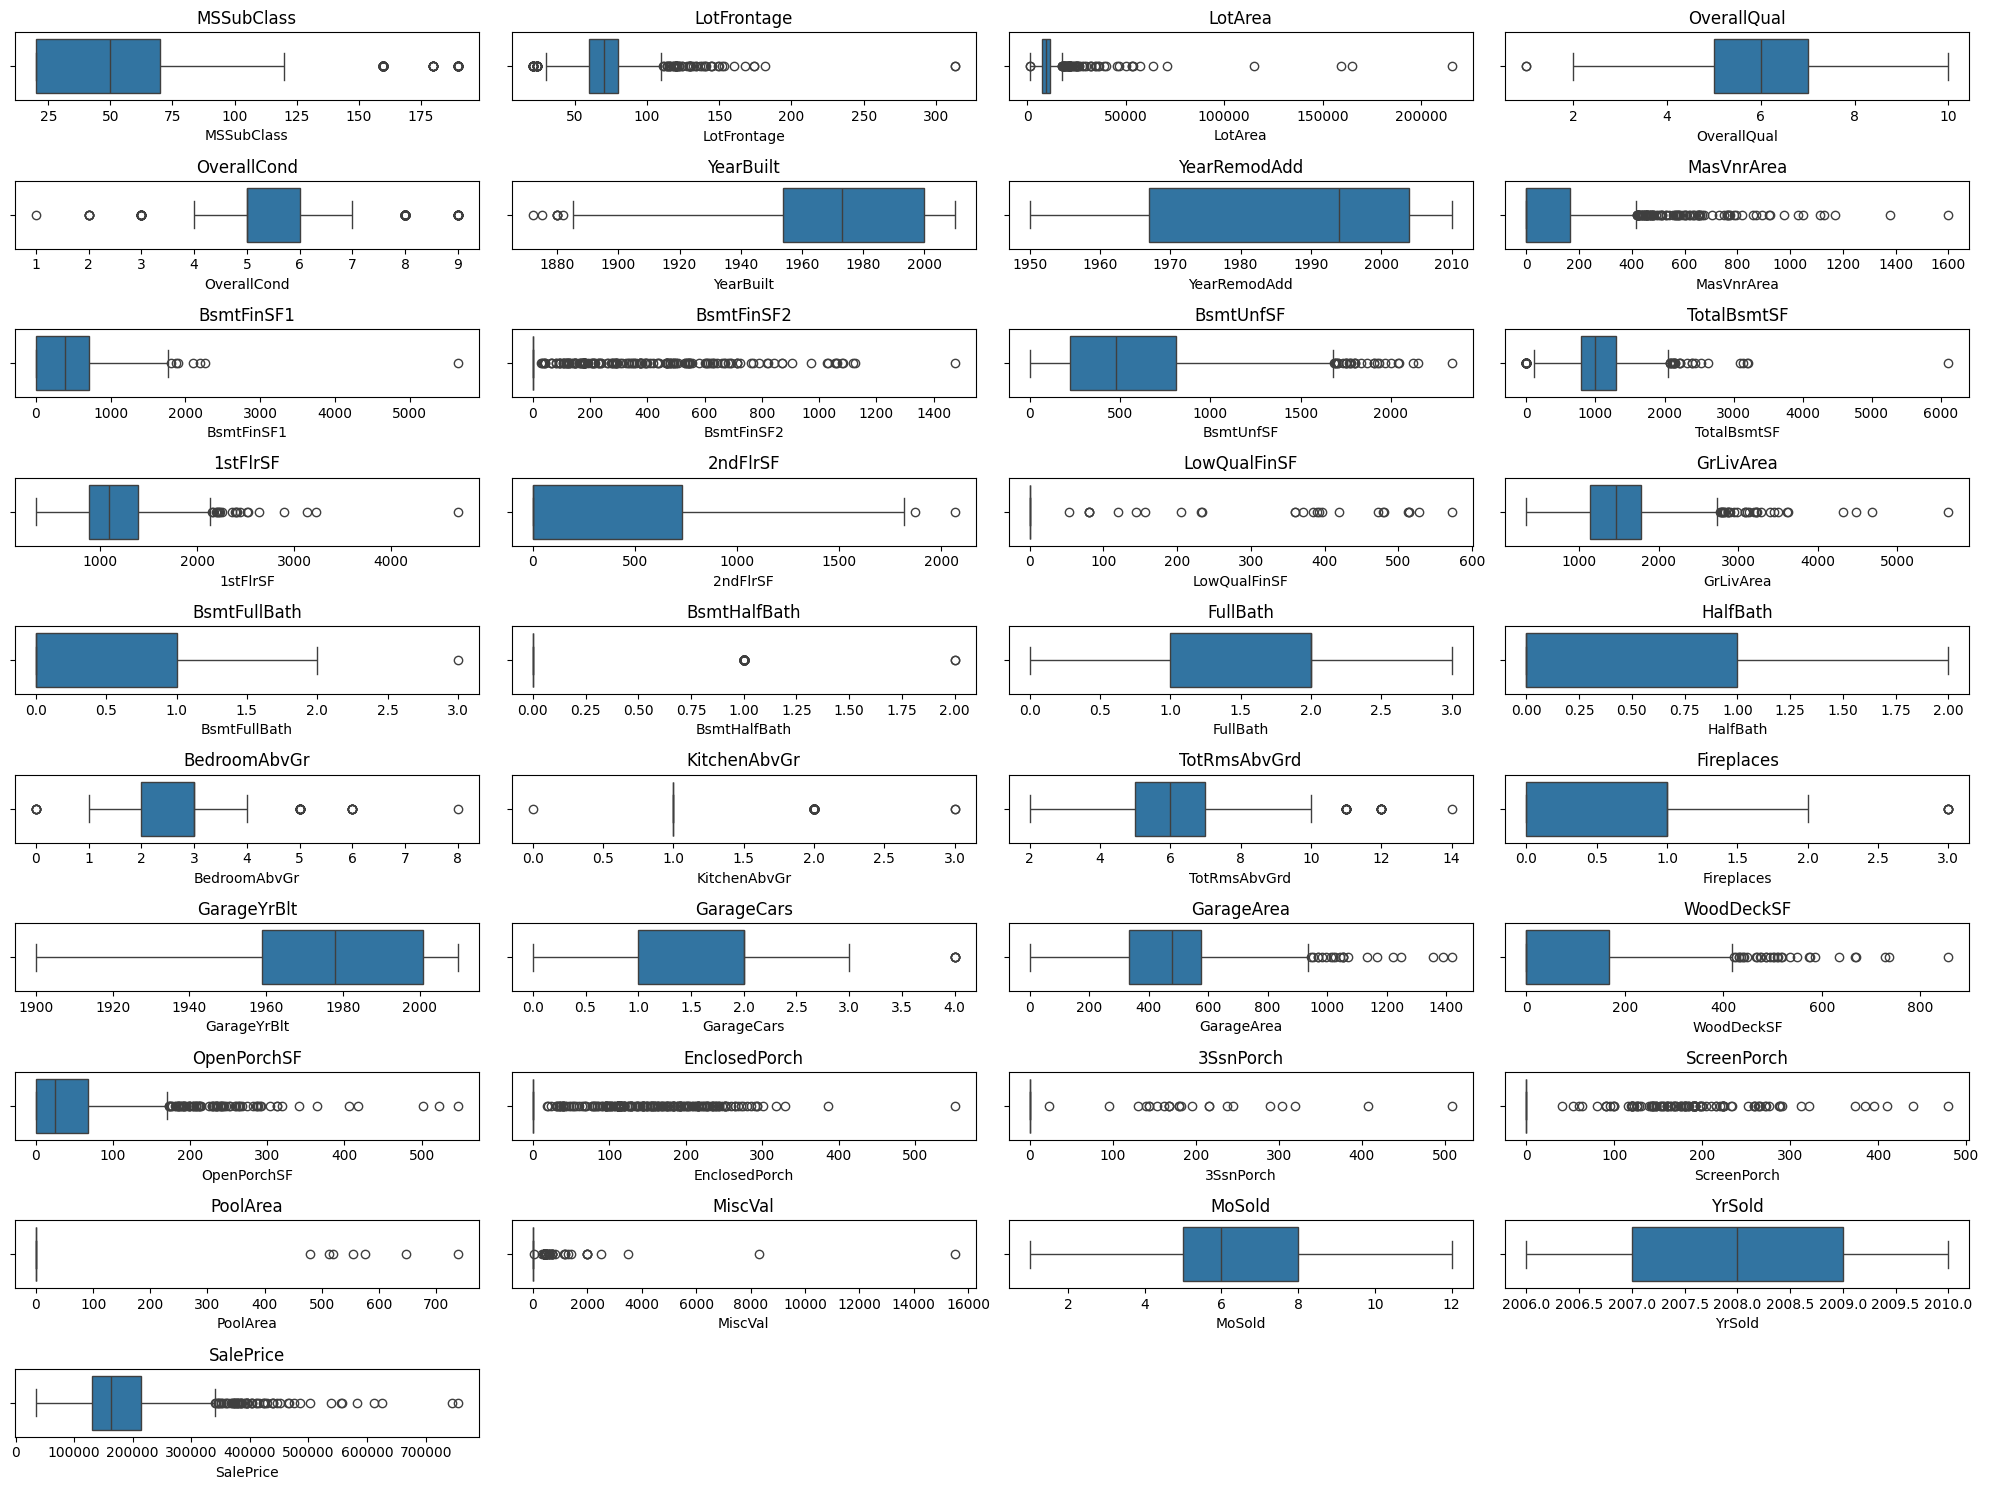

In [ ]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 4 + 1, 4, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Выбросы есть, но их обработка приводит к потере более 50% данных, поэтому будем использовать RobustScaler для нормировки, который устойчив к выбросам

In [ ]:
scaler = RobustScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,Garage

#### Промежуточные выводы


1. Была выполнена подготовка данных к обучению
2. В численных признаках есть выбросы, была использована нормировка устойчивая к выбросам

### Обучение модели

Выделим тренировочную, валидационную и тестовую выборку

In [ ]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=4092024)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=4092024)

In [ ]:
train_dataset = TensorDataset(torch.Tensor(X_train.values).float(),torch.Tensor(y_train.values).float())
val_dataset = TensorDataset(torch.Tensor(X_val.values).float(),torch.Tensor(y_val.values).float())
test_dataset = TensorDataset(torch.Tensor(X_test.values).float(),torch.Tensor(y_test.values).float())

print(f'Размер тренировочной выборки: {len(train_dataset)}')
print(f'Размер валидационной выборки: {len(val_dataset)}')
print(f'Размер тестовой выборки: {len(test_dataset)}')

Размер тренировочной выборки: 1168
Размер валидационной выборки: 146
Размер тестовой выборки: 146


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

После многочисленных экспериментов размер batch_size = 32 - оказался лучшим

In [ ]:
class HousePriceModel(nn.Module):
    def __init__(self, input_dim):
        super(HousePriceModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(32, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.activation(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

input_dim = X_train.shape[1]
model = HousePriceModel(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    best_model_path = 'best_model.pth'

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, targets in tqdm(train_loader):
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs.squeeze(), targets)
                val_loss += loss.item()

        val_loss = val_loss / len(val_loader)
        val_losses.append(val_loss)

        print(f'Эпоха {epoch+1}/{num_epochs}, Ошибки обучения: {train_loss:.4f}, Ошибка валидации: {val_loss:.4f}')

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), best_model_path)

    print(f'Лучшее значение ошибки валидации: {best_val_loss:.4f}')
    return train_losses, val_losses, best_model_path

num_epochs = 100
train_losses, val_losses, best_model_path = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs)


100%|██████████| 37/37 [00:00<00:00, 493.02it/s]


Эпоха 1/100, Ошибки обучения: 2.1272, Ошибка валидации: 4.8803


100%|██████████| 37/37 [00:00<00:00, 441.14it/s]


Эпоха 2/100, Ошибки обучения: 1.2816, Ошибка валидации: 0.8018


100%|██████████| 37/37 [00:00<00:00, 508.04it/s]


Эпоха 3/100, Ошибки обучения: 0.8359, Ошибка валидации: 0.5075


100%|██████████| 37/37 [00:00<00:00, 472.54it/s]


Эпоха 4/100, Ошибки обучения: 0.5622, Ошибка валидации: 0.5975


100%|██████████| 37/37 [00:00<00:00, 488.12it/s]


Эпоха 5/100, Ошибки обучения: 0.5414, Ошибка валидации: 0.4754


100%|██████████| 37/37 [00:00<00:00, 431.43it/s]


Эпоха 6/100, Ошибки обучения: 0.4230, Ошибка валидации: 0.4056


100%|██████████| 37/37 [00:00<00:00, 520.45it/s]


Эпоха 7/100, Ошибки обучения: 0.4351, Ошибка валидации: 0.3526


100%|██████████| 37/37 [00:00<00:00, 519.09it/s]


Эпоха 8/100, Ошибки обучения: 0.3213, Ошибка валидации: 0.3599


100%|██████████| 37/37 [00:00<00:00, 374.06it/s]


Эпоха 9/100, Ошибки обучения: 0.2913, Ошибка валидации: 0.3697


100%|██████████| 37/37 [00:00<00:00, 372.13it/s]


Эпоха 10/100, Ошибки обучения: 0.2702, Ошибка валидации: 0.3180


100%|██████████| 37/37 [00:00<00:00, 464.05it/s]


Эпоха 11/100, Ошибки обучения: 0.2823, Ошибка валидации: 0.3225


100%|██████████| 37/37 [00:00<00:00, 449.32it/s]


Эпоха 12/100, Ошибки обучения: 0.2657, Ошибка валидации: 0.3164


100%|██████████| 37/37 [00:00<00:00, 509.04it/s]


Эпоха 13/100, Ошибки обучения: 0.2812, Ошибка валидации: 0.3170


100%|██████████| 37/37 [00:00<00:00, 514.72it/s]


Эпоха 14/100, Ошибки обучения: 0.2344, Ошибка валидации: 0.3202


100%|██████████| 37/37 [00:00<00:00, 487.56it/s]


Эпоха 15/100, Ошибки обучения: 0.2338, Ошибка валидации: 0.2744


100%|██████████| 37/37 [00:00<00:00, 516.06it/s]


Эпоха 16/100, Ошибки обучения: 0.2587, Ошибка валидации: 0.3269


100%|██████████| 37/37 [00:00<00:00, 533.29it/s]


Эпоха 17/100, Ошибки обучения: 0.2219, Ошибка валидации: 0.3090


100%|██████████| 37/37 [00:00<00:00, 503.28it/s]


Эпоха 18/100, Ошибки обучения: 0.2123, Ошибка валидации: 0.2881


100%|██████████| 37/37 [00:00<00:00, 410.80it/s]


Эпоха 19/100, Ошибки обучения: 0.2020, Ошибка валидации: 0.2880


100%|██████████| 37/37 [00:00<00:00, 307.98it/s]


Эпоха 20/100, Ошибки обучения: 0.2003, Ошибка валидации: 0.2785


100%|██████████| 37/37 [00:00<00:00, 293.41it/s]


Эпоха 21/100, Ошибки обучения: 0.1971, Ошибка валидации: 0.2882


100%|██████████| 37/37 [00:00<00:00, 304.61it/s]


Эпоха 22/100, Ошибки обучения: 0.2336, Ошибка валидации: 0.2889


100%|██████████| 37/37 [00:00<00:00, 304.51it/s]


Эпоха 23/100, Ошибки обучения: 0.1768, Ошибка валидации: 0.2751


100%|██████████| 37/37 [00:00<00:00, 378.17it/s]


Эпоха 24/100, Ошибки обучения: 0.1550, Ошибка валидации: 0.2773


100%|██████████| 37/37 [00:00<00:00, 375.28it/s]


Эпоха 25/100, Ошибки обучения: 0.1944, Ошибка валидации: 0.2669


100%|██████████| 37/37 [00:00<00:00, 338.39it/s]


Эпоха 26/100, Ошибки обучения: 0.1851, Ошибка валидации: 0.2645


100%|██████████| 37/37 [00:00<00:00, 353.93it/s]


Эпоха 27/100, Ошибки обучения: 0.2177, Ошибка валидации: 0.2675


100%|██████████| 37/37 [00:00<00:00, 264.83it/s]


Эпоха 28/100, Ошибки обучения: 0.1974, Ошибка валидации: 0.2850


100%|██████████| 37/37 [00:00<00:00, 292.01it/s]


Эпоха 29/100, Ошибки обучения: 0.1447, Ошибка валидации: 0.2864


100%|██████████| 37/37 [00:00<00:00, 336.95it/s]


Эпоха 30/100, Ошибки обучения: 0.1716, Ошибка валидации: 0.2778


100%|██████████| 37/37 [00:00<00:00, 341.15it/s]


Эпоха 31/100, Ошибки обучения: 0.1784, Ошибка валидации: 0.2969


100%|██████████| 37/37 [00:00<00:00, 384.39it/s]


Эпоха 32/100, Ошибки обучения: 0.1643, Ошибка валидации: 0.3209


100%|██████████| 37/37 [00:00<00:00, 393.15it/s]


Эпоха 33/100, Ошибки обучения: 0.1777, Ошибка валидации: 0.3121


100%|██████████| 37/37 [00:00<00:00, 290.06it/s]


Эпоха 34/100, Ошибки обучения: 0.1753, Ошибка валидации: 0.3039


100%|██████████| 37/37 [00:00<00:00, 223.90it/s]


Эпоха 35/100, Ошибки обучения: 0.1573, Ошибка валидации: 0.2820


100%|██████████| 37/37 [00:00<00:00, 315.86it/s]


Эпоха 36/100, Ошибки обучения: 0.1541, Ошибка валидации: 0.2431


100%|██████████| 37/37 [00:00<00:00, 237.91it/s]


Эпоха 37/100, Ошибки обучения: 0.1589, Ошибка валидации: 0.2631


100%|██████████| 37/37 [00:00<00:00, 261.73it/s]


Эпоха 38/100, Ошибки обучения: 0.1644, Ошибка валидации: 0.2578


100%|██████████| 37/37 [00:00<00:00, 297.91it/s]


Эпоха 39/100, Ошибки обучения: 0.1633, Ошибка валидации: 0.2647


100%|██████████| 37/37 [00:00<00:00, 323.39it/s]


Эпоха 40/100, Ошибки обучения: 0.1795, Ошибка валидации: 0.2878


100%|██████████| 37/37 [00:00<00:00, 284.63it/s]


Эпоха 41/100, Ошибки обучения: 0.1529, Ошибка валидации: 0.2759


100%|██████████| 37/37 [00:00<00:00, 310.19it/s]


Эпоха 42/100, Ошибки обучения: 0.1636, Ошибка валидации: 0.2175


100%|██████████| 37/37 [00:00<00:00, 321.48it/s]


Эпоха 43/100, Ошибки обучения: 0.1436, Ошибка валидации: 0.1985


100%|██████████| 37/37 [00:00<00:00, 304.30it/s]


Эпоха 44/100, Ошибки обучения: 0.1659, Ошибка валидации: 0.2125


100%|██████████| 37/37 [00:00<00:00, 233.14it/s]


Эпоха 45/100, Ошибки обучения: 0.1626, Ошибка валидации: 0.1821


100%|██████████| 37/37 [00:00<00:00, 273.85it/s]


Эпоха 46/100, Ошибки обучения: 0.1317, Ошибка валидации: 0.1941


100%|██████████| 37/37 [00:00<00:00, 281.96it/s]


Эпоха 47/100, Ошибки обучения: 0.1547, Ошибка валидации: 0.1958


100%|██████████| 37/37 [00:00<00:00, 370.76it/s]


Эпоха 48/100, Ошибки обучения: 0.1462, Ошибка валидации: 0.2062


100%|██████████| 37/37 [00:00<00:00, 380.38it/s]


Эпоха 49/100, Ошибки обучения: 0.1351, Ошибка валидации: 0.1897


100%|██████████| 37/37 [00:00<00:00, 476.73it/s]


Эпоха 50/100, Ошибки обучения: 0.1285, Ошибка валидации: 0.1909


100%|██████████| 37/37 [00:00<00:00, 489.02it/s]


Эпоха 51/100, Ошибки обучения: 0.1320, Ошибка валидации: 0.1864


100%|██████████| 37/37 [00:00<00:00, 470.23it/s]


Эпоха 52/100, Ошибки обучения: 0.1312, Ошибка валидации: 0.1917


100%|██████████| 37/37 [00:00<00:00, 476.57it/s]


Эпоха 53/100, Ошибки обучения: 0.1598, Ошибка валидации: 0.2105


100%|██████████| 37/37 [00:00<00:00, 399.65it/s]


Эпоха 54/100, Ошибки обучения: 0.1396, Ошибка валидации: 0.1848


100%|██████████| 37/37 [00:00<00:00, 478.06it/s]


Эпоха 55/100, Ошибки обучения: 0.1348, Ошибка валидации: 0.1717


100%|██████████| 37/37 [00:00<00:00, 438.92it/s]


Эпоха 56/100, Ошибки обучения: 0.1263, Ошибка валидации: 0.1672


100%|██████████| 37/37 [00:00<00:00, 468.32it/s]


Эпоха 57/100, Ошибки обучения: 0.1286, Ошибка валидации: 0.1819


100%|██████████| 37/37 [00:00<00:00, 341.48it/s]


Эпоха 58/100, Ошибки обучения: 0.1478, Ошибка валидации: 0.1914


100%|██████████| 37/37 [00:00<00:00, 334.81it/s]


Эпоха 59/100, Ошибки обучения: 0.1153, Ошибка валидации: 0.1614


100%|██████████| 37/37 [00:00<00:00, 452.36it/s]


Эпоха 60/100, Ошибки обучения: 0.1372, Ошибка валидации: 0.1689


100%|██████████| 37/37 [00:00<00:00, 443.11it/s]


Эпоха 61/100, Ошибки обучения: 0.1172, Ошибка валидации: 0.1819


100%|██████████| 37/37 [00:00<00:00, 449.26it/s]


Эпоха 62/100, Ошибки обучения: 0.1165, Ошибка валидации: 0.1678


100%|██████████| 37/37 [00:00<00:00, 450.31it/s]


Эпоха 63/100, Ошибки обучения: 0.1374, Ошибка валидации: 0.2071


100%|██████████| 37/37 [00:00<00:00, 370.40it/s]


Эпоха 64/100, Ошибки обучения: 0.1095, Ошибка валидации: 0.1626


100%|██████████| 37/37 [00:00<00:00, 384.82it/s]


Эпоха 65/100, Ошибки обучения: 0.1077, Ошибка валидации: 0.1741


100%|██████████| 37/37 [00:00<00:00, 441.01it/s]


Эпоха 66/100, Ошибки обучения: 0.1226, Ошибка валидации: 0.1697


100%|██████████| 37/37 [00:00<00:00, 290.46it/s]


Эпоха 67/100, Ошибки обучения: 0.1338, Ошибка валидации: 0.1777


100%|██████████| 37/37 [00:00<00:00, 352.68it/s]


Эпоха 68/100, Ошибки обучения: 0.1354, Ошибка валидации: 0.1567


100%|██████████| 37/37 [00:00<00:00, 446.40it/s]


Эпоха 69/100, Ошибки обучения: 0.1085, Ошибка валидации: 0.1634


100%|██████████| 37/37 [00:00<00:00, 473.89it/s]


Эпоха 70/100, Ошибки обучения: 0.0984, Ошибка валидации: 0.1680


100%|██████████| 37/37 [00:00<00:00, 462.47it/s]


Эпоха 71/100, Ошибки обучения: 0.1051, Ошибка валидации: 0.1695


100%|██████████| 37/37 [00:00<00:00, 442.77it/s]


Эпоха 72/100, Ошибки обучения: 0.1161, Ошибка валидации: 0.1780


100%|██████████| 37/37 [00:00<00:00, 437.42it/s]


Эпоха 73/100, Ошибки обучения: 0.1375, Ошибка валидации: 0.2182


100%|██████████| 37/37 [00:00<00:00, 419.65it/s]


Эпоха 74/100, Ошибки обучения: 0.1116, Ошибка валидации: 0.1584


100%|██████████| 37/37 [00:00<00:00, 450.28it/s]

Эпоха 75/100, Ошибки обучения: 0.1039, Ошибка валидации: 0.1487



100%|██████████| 37/37 [00:00<00:00, 394.67it/s]


Эпоха 76/100, Ошибки обучения: 0.1161, Ошибка валидации: 0.1529


100%|██████████| 37/37 [00:00<00:00, 307.40it/s]


Эпоха 77/100, Ошибки обучения: 0.1145, Ошибка валидации: 0.1647


100%|██████████| 37/37 [00:00<00:00, 428.80it/s]


Эпоха 78/100, Ошибки обучения: 0.0984, Ошибка валидации: 0.1327


100%|██████████| 37/37 [00:00<00:00, 428.93it/s]


Эпоха 79/100, Ошибки обучения: 0.1242, Ошибка валидации: 0.1535


100%|██████████| 37/37 [00:00<00:00, 490.31it/s]


Эпоха 80/100, Ошибки обучения: 0.0926, Ошибка валидации: 0.1674


100%|██████████| 37/37 [00:00<00:00, 443.42it/s]


Эпоха 81/100, Ошибки обучения: 0.1103, Ошибка валидации: 0.3880


100%|██████████| 37/37 [00:00<00:00, 476.02it/s]


Эпоха 82/100, Ошибки обучения: 0.1133, Ошибка валидации: 0.1410


100%|██████████| 37/37 [00:00<00:00, 406.03it/s]


Эпоха 83/100, Ошибки обучения: 0.1022, Ошибка валидации: 0.1353


100%|██████████| 37/37 [00:00<00:00, 467.29it/s]


Эпоха 84/100, Ошибки обучения: 0.1040, Ошибка валидации: 0.1521


100%|██████████| 37/37 [00:00<00:00, 469.69it/s]


Эпоха 85/100, Ошибки обучения: 0.1164, Ошибка валидации: 0.1548


100%|██████████| 37/37 [00:00<00:00, 418.17it/s]


Эпоха 86/100, Ошибки обучения: 0.0900, Ошибка валидации: 0.1625


100%|██████████| 37/37 [00:00<00:00, 340.80it/s]


Эпоха 87/100, Ошибки обучения: 0.0920, Ошибка валидации: 0.1376


100%|██████████| 37/37 [00:00<00:00, 416.88it/s]


Эпоха 88/100, Ошибки обучения: 0.1059, Ошибка валидации: 0.1520


100%|██████████| 37/37 [00:00<00:00, 459.99it/s]


Эпоха 89/100, Ошибки обучения: 0.1034, Ошибка валидации: 0.1376


100%|██████████| 37/37 [00:00<00:00, 477.65it/s]


Эпоха 90/100, Ошибки обучения: 0.0886, Ошибка валидации: 0.1512


100%|██████████| 37/37 [00:00<00:00, 475.62it/s]


Эпоха 91/100, Ошибки обучения: 0.0972, Ошибка валидации: 0.1427


100%|██████████| 37/37 [00:00<00:00, 458.67it/s]


Эпоха 92/100, Ошибки обучения: 0.1158, Ошибка валидации: 0.1582


100%|██████████| 37/37 [00:00<00:00, 446.51it/s]


Эпоха 93/100, Ошибки обучения: 0.0910, Ошибка валидации: 0.1327


100%|██████████| 37/37 [00:00<00:00, 405.01it/s]


Эпоха 94/100, Ошибки обучения: 0.0953, Ошибка валидации: 0.1202


100%|██████████| 37/37 [00:00<00:00, 464.81it/s]


Эпоха 95/100, Ошибки обучения: 0.1011, Ошибка валидации: 0.1430


100%|██████████| 37/37 [00:00<00:00, 381.44it/s]


Эпоха 96/100, Ошибки обучения: 0.1015, Ошибка валидации: 0.1564


100%|██████████| 37/37 [00:00<00:00, 371.09it/s]


Эпоха 97/100, Ошибки обучения: 0.1242, Ошибка валидации: 0.1314


100%|██████████| 37/37 [00:00<00:00, 488.82it/s]


Эпоха 98/100, Ошибки обучения: 0.1011, Ошибка валидации: 0.1327


100%|██████████| 37/37 [00:00<00:00, 466.69it/s]


Эпоха 99/100, Ошибки обучения: 0.1002, Ошибка валидации: 0.1439


100%|██████████| 37/37 [00:00<00:00, 454.05it/s]

Эпоха 100/100, Ошибки обучения: 0.0975, Ошибка валидации: 0.1567
Лучшее значение ошибки валидации: 0.1202


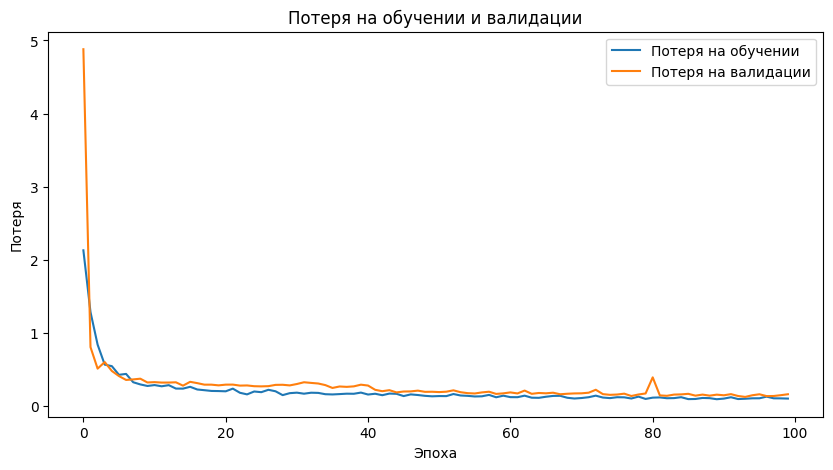

Потеря на тестовых данных: 0.3188


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Потеря на обучении')
plt.plot(val_losses, label='Потеря на валидации')
plt.xlabel('Эпоха')
plt.ylabel('Потеря')
plt.legend()
plt.title('Потеря на обучении и валидации')
plt.show()


model = HousePriceModel(input_dim).to(device)
model.load_state_dict(torch.load(best_model_path,weights_only=True))
model.eval()

test_loss = 0.0
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        test_loss += loss.item()

test_loss = test_loss / len(test_loader)
print(f'Потеря на тестовых данных: {test_loss:.4f}')

#### Промежуточные выводы

1. В процессе настройки модели, было протестировано большое количество параметров, изначально использовалась обычная модель с 3 слоями(128,64,32 нейрона), которая на 100 эпохах показывала неплохой результат, однако сходимость и значения на валидационной выборке можно было бы улучшить с помощью регуляризации и других методов.
2. По итогу лучшей моделью, оказалась модель с 2 скрытыми слоя (64 и 32 нейрона) с активацией ReLU и Dropout (0.3). Модель обучалась с использованием MSELoss и оптимизатора Adam с начальной скоростью обучения 0.001 и L2-регуляризацией. В ходе 100 эпох обучения эта модель показала наилучший результат на валидационной выборке, что подтверждается минимальным значением ошибки.
3. Ошибки на тренировочной и валидационной выборках стабилизировались на низком уровне, что свидетельствует о правильной настройке и отсутствии переобучения.
4. Итоговая ошибка на тестовой выборке 0.3188 - хороший результат, но возможно результат был бы лучше, если выборка была больше и в ней было меньше выбросов